In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from matplotlib.ticker import FuncFormatter

In [ ]:
dataset = pd.read_csv('Dataset/Dataset.csv')

In [ ]:
dataset.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Description of features given in the data<br>**

**step:** Represents a unit of time where 1 step equals 1 hour<br>
**type**: Type of online transaction<br>
**amount:** The amount of the transaction<br>
**nameOrig:** Customer starting the transaction<br>
**oldbalanceOrg:** Balance before the transaction<br>
**newbalanceOrig:** Balance after the transaction<br>
**nameDest:** Recipient of the transaction<br>
**oldbalanceDest:** Initial balance of recipient before the transaction<br>
**newbalanceDest:** The new balance of recipient after the transaction<br>
**isFraud:** Fraud transaction

In [ ]:
dataset.rename(columns = {'nameOrig':'Customer', 'oldbalanceOrg':'Customer_Old_Balance', 'newbalanceOrig':'Customer_new_Balance', 'nameDest':'Recipient', 'oldbalanceDest':'Recipient_Old_Balance', 'newbalanceDest':'Recipient_New_Balance' }, inplace = True)

In [ ]:
dataset.head(5)

,step,type,amount,Customer,Customer_Old_Balance,Customer_new_Balance,Recipient,Recipient_Old_Balance,Recipient_New_Balance,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   type                   object 
 2   amount                 float64
 3   Customer               object 
 4   Customer_Old_Balance   float64
 5   Customer_new_Balance   float64
 6   Recipient              object 
 7   Recipient_Old_Balance  float64
 8   Recipient_New_Balance  float64
 9   isFraud                int64  
 10  isFlaggedFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

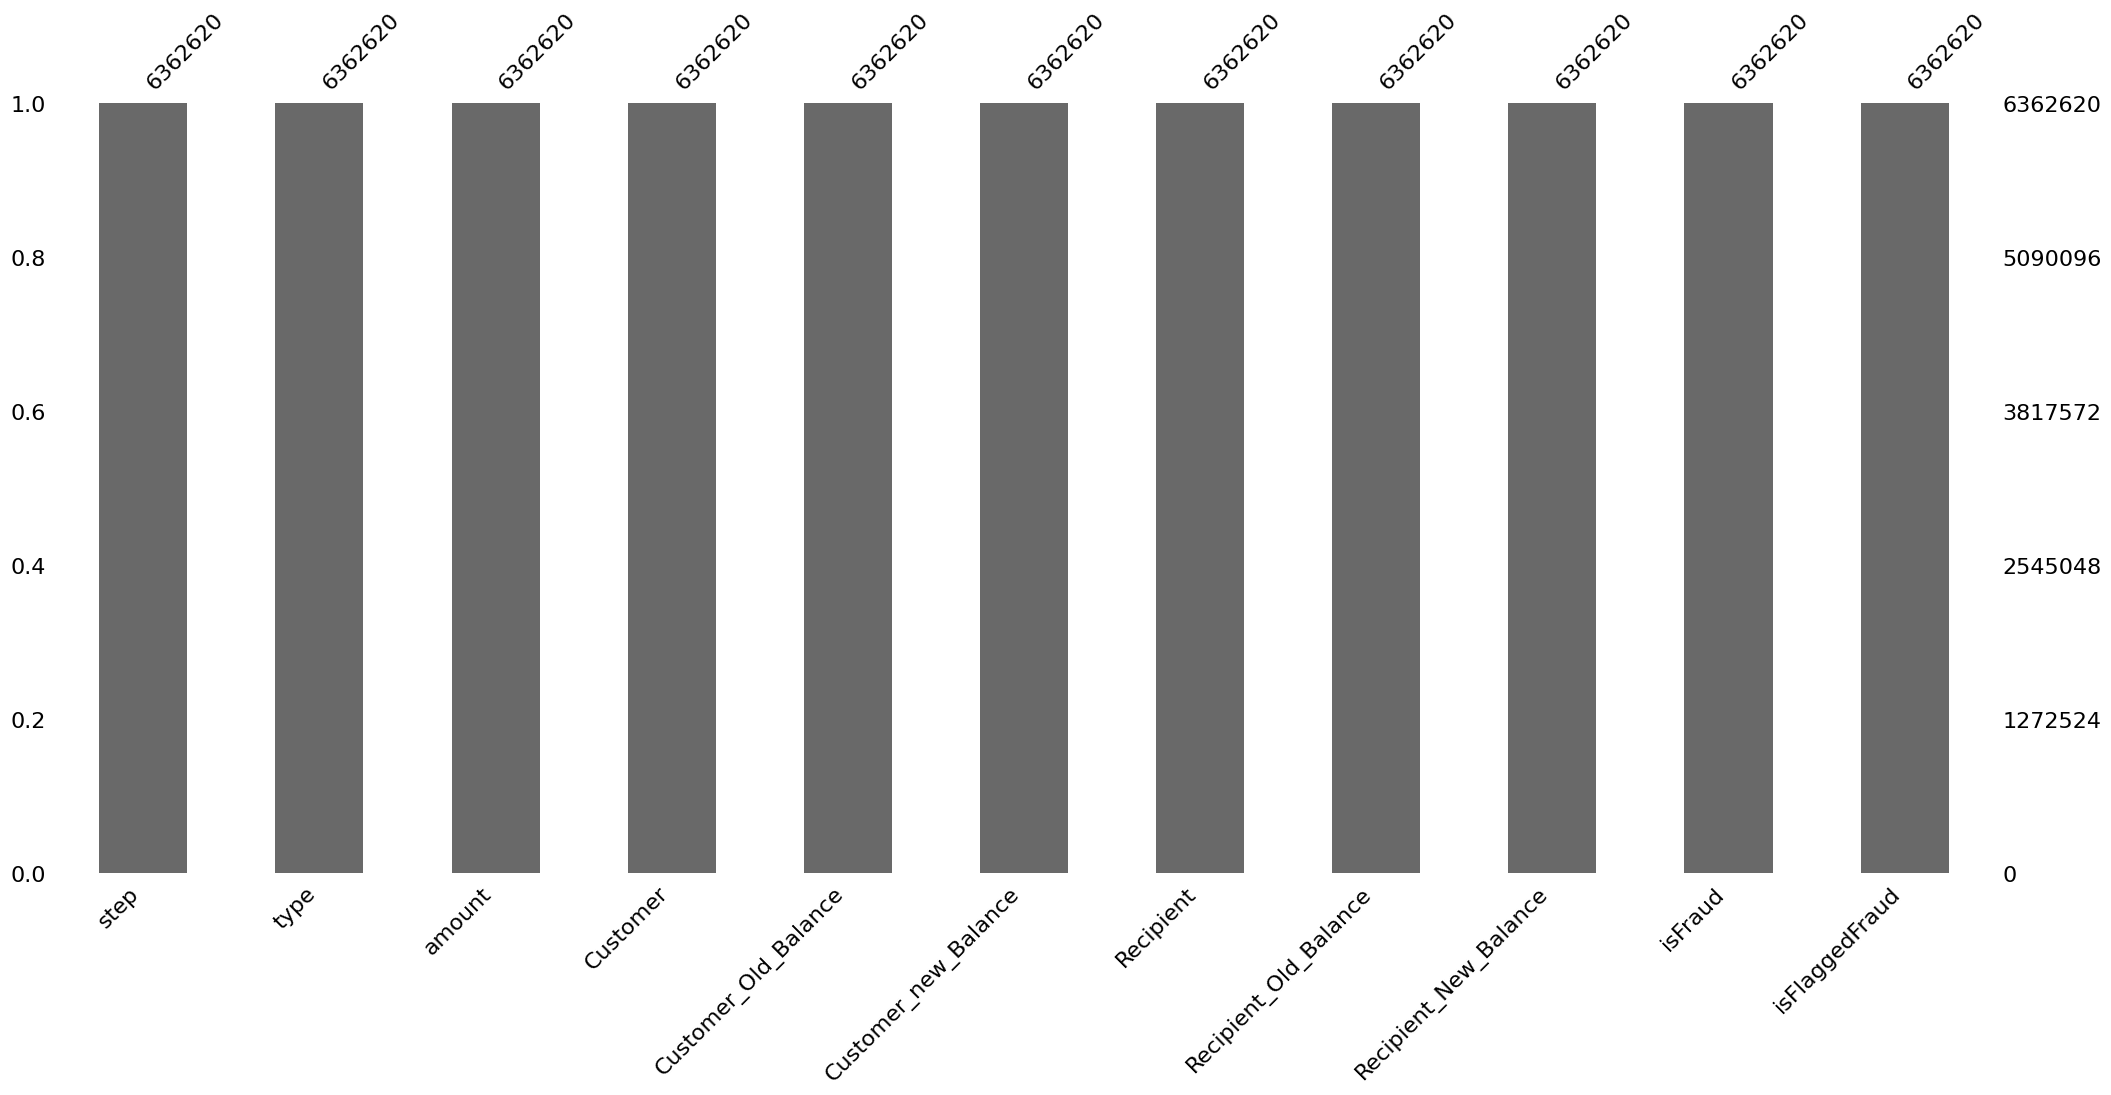

In [ ]:
msno.bar(dataset)

**OBSERVATION:** We can see above there is no null values or missing values in the dataset. To confirm we can check with "isna" method.

In [ ]:
dataset.isnull().sum()

step                     0
type                     0
amount                   0
Customer                 0
Customer_Old_Balance     0
Customer_new_Balance     0
Recipient                0
Recipient_Old_Balance    0
Recipient_New_Balance    0
isFraud                  0
isFlaggedFraud           0
dtype: int64

**OBSERVATION:** Now it is confirmed that there is no null or missing values in the dataset.

In [ ]:
dataset.describe()

,step,amount,Customer_Old_Balance,Customer_new_Balance,Recipient_Old_Balance,Recipient_New_Balance,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## **Feature Engineering & Exploratory Data Analysis for numerical data**

For feature engineering, we will traverse each parameter/column and prepare it for modelling (if required).<br> But first we will check the categorical and numerical columns in our dataset.

In [ ]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns in the dataset:")
print(categorical_cols)
print("Numerical Columns in the dataset:")
print(numerical_cols)

Categorical Columns in the dataset:
Index(['type', 'Customer', 'Recipient'], dtype='object')
Numerical Columns in the dataset:
['step', 'amount', 'Customer_Old_Balance', 'Customer_new_Balance', 'Recipient_Old_Balance', 'Recipient_New_Balance', 'isFraud', 'isFlaggedFraud']


**STEP**

<Axes: xlabel='step', ylabel='Density'>

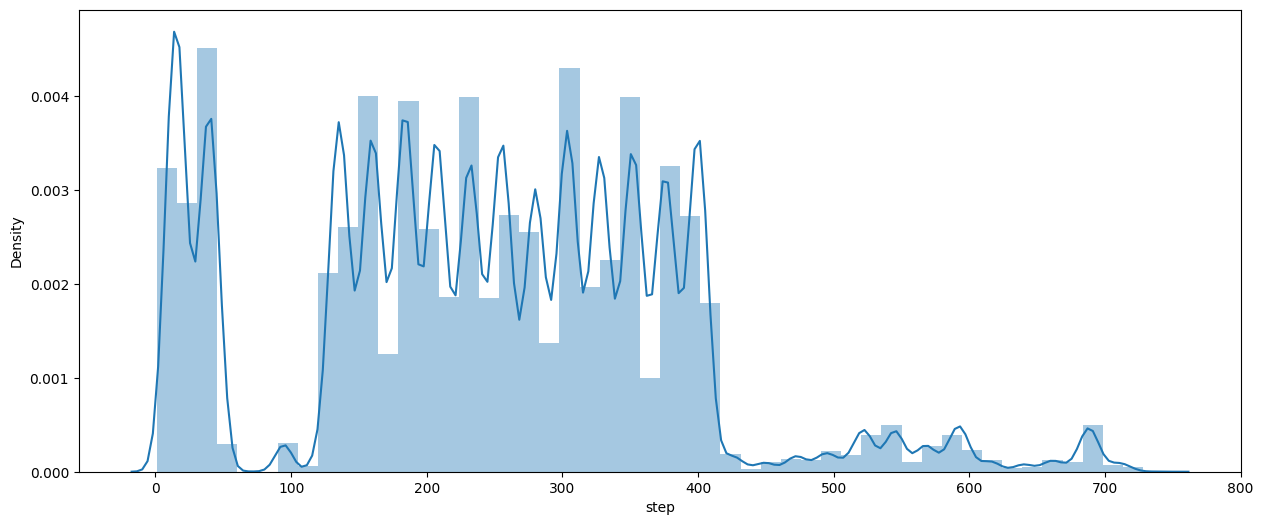

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(dataset['step'], bins=50)

### **Type**

In [ ]:
unique_types = dataset['type'].unique();
type_counts = dataset['type'].value_counts()

num_unique_types = len(unique_types)
print(type_counts)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
def pie_chart_config(chart_name, len_values='', color_map=''):
  pc_config = dict(
      fontsize   = 6,
      figsize    = (60,5),
      autopct    = '%1.1f%%'
    )
  pc_config['title'] = chart_name
  if color_map:
    pc_config['colormap'] = color_map
  if len_values:
    pc_config['explode'] = [0.1]*len_values

  return pc_config


<Axes: title={'center': 'Category Distribution - Type'}, ylabel='type'>

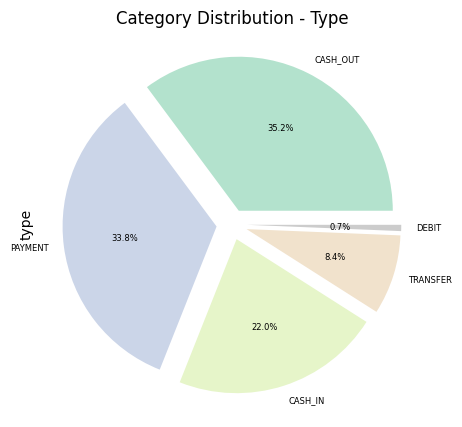

In [ ]:
category_config = pie_chart_config('Category Distribution - Type', color_map='Pastel2', len_values=5) # category has 5 unique values and we would like to plot all.
dataset['type'].value_counts().plot.pie(**category_config)

With the above distribution chart, it is clearly depictable that there is fair distribution of each value of type. As we are performing fraud detection, we cannot dispose any category.

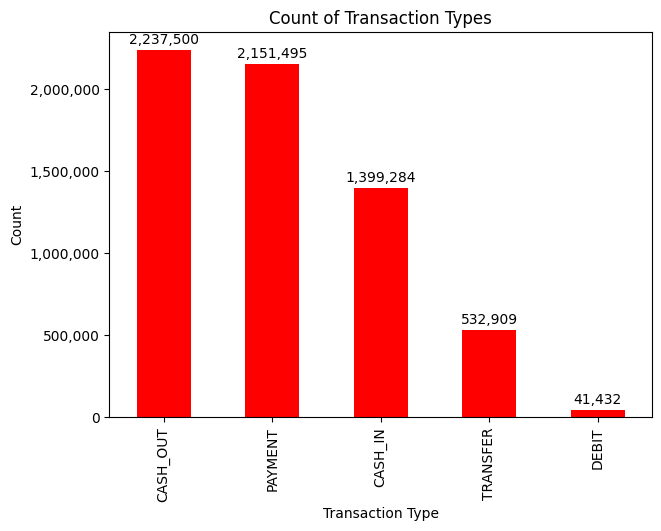

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
bars = type_counts.plot(kind='bar', color='red')

# Add data labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Format count axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{value:,.0f}'))
plt.show()

**AMOUNT**

<Axes: ylabel='amount'>

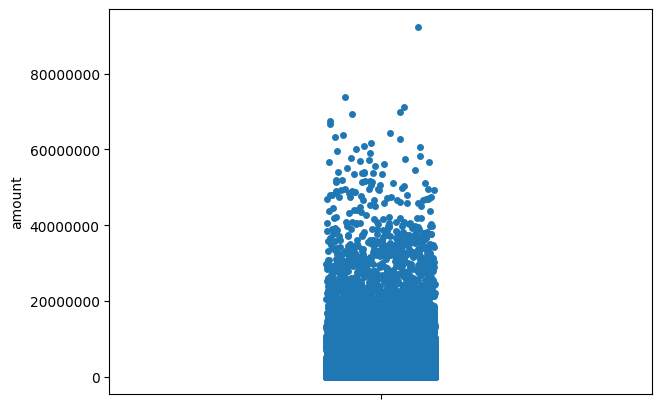

In [ ]:
plt.figure(figsize=(7,5))
sns.stripplot(y=dataset.amount)

<Axes: xlabel='amount'>

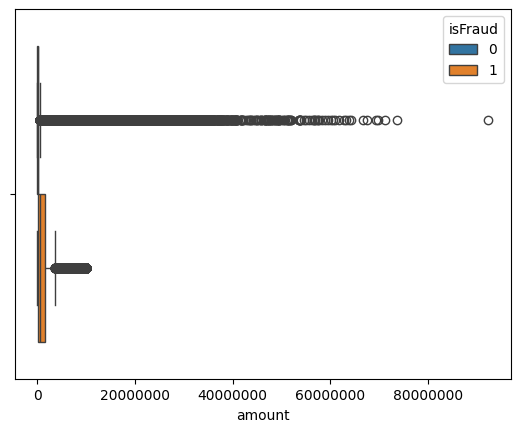

In [ ]:
sns.boxplot(data=dataset, x="amount", hue="isFraud")

# **IsFlagFraud**

In [ ]:
dataset.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


Out of the aggregate of 63 lakhs records, only 16 were hypothesized and identified as fraud, constituting a notably low count. The real incidence of fraud exhibits a substantially higher magnitude compared to the 'isFlaggedFraud' column.

Now, let's assess the accuracy of the values they presumed and flagged as fraudulent.

In [ ]:
fraud_records_flagged = dataset[(dataset.isFraud==1) & (dataset.isFlaggedFraud==1)]
fraud_records_flagged.head(5)

,step,type,amount,Customer,Customer_Old_Balance,Customer_new_Balance,Recipient,Recipient_Old_Balance,Recipient_New_Balance,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [ ]:
fraud_records_flagged.shape

(16, 11)

This indicates that all flagged records for fraud were accurate.

Now, let's examine the proportion of flagged fraud records to the total incidents of fraud.

In [ ]:
total_fraud= dataset[dataset.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

total_isflaggedFraud= fraud_records_flagged.shape[0]
total_isflaggedFraud

16

In [ ]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Flagged fraud %: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Incorrectly flagged fraud %: ',round(unflagged_percent,3))

Flagged fraud %:  0.195
Incorrectly flagged fraud %:  99.805


As evidenced by the fraction of entries designated as fraudulent, the percentage stands at 0.195%, indicating an exceedingly low occurrence rate.

# **IsFarud**

In [ ]:
total_transactions = dataset.shape[0]

fraud_transaction = dataset[dataset.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

fraud_amount= dataset[dataset.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


,step,type,amount,Customer,Customer_Old_Balance,Customer_new_Balance,Recipient,Recipient_Old_Balance,Recipient_New_Balance,isFraud,isFlaggedFraud
3760283,279,CASH_OUT,10000000.0,C1214015158,10000000.00,0.00,C2110157840,0.00,10000000.00,1,0
5987587,409,CASH_OUT,10000000.0,C97242201,10000000.00,0.00,C786701128,8496.86,10008496.86,1,0
1707592,160,CASH_OUT,10000000.0,C525906402,10000000.00,0.00,C43869769,2145275.47,12145275.47,1,0
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1,0
1707590,160,CASH_OUT,10000000.0,C2068007279,10000000.00,0.00,C836488544,158643.25,10158643.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5996410,425,CASH_OUT,0.0,C69493310,0.00,0.00,C719711728,2921531.34,2921531.34,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.00,0.00,C1462759334,76759.90,76759.90,1,0
6362461,730,CASH_OUT,0.0,C729003789,0.00,0.00,C1388096959,1008609.53,1008609.53,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.00,0.00,C1156763710,0.00,0.00,1,0


<Axes: ylabel='Frequency'>

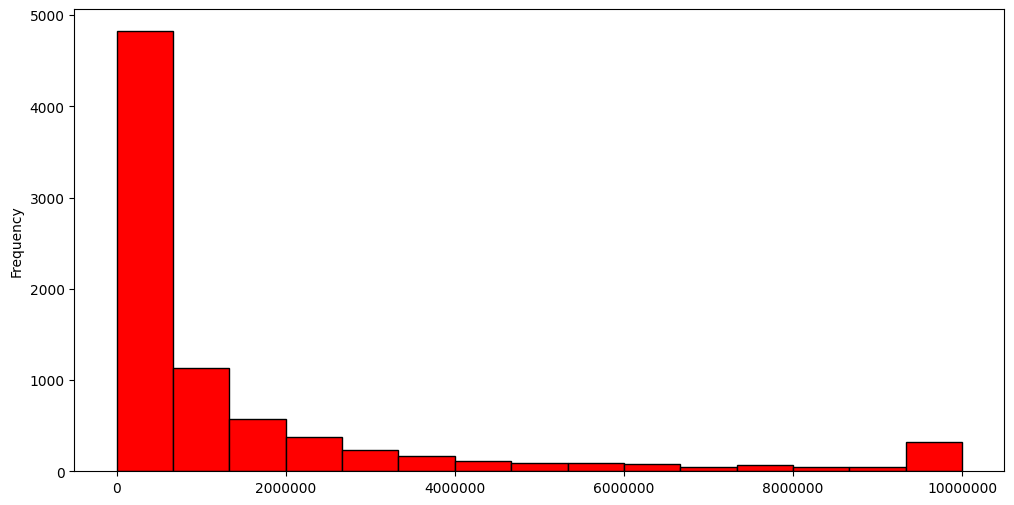

In [ ]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='red',edgecolor='black')

We've identified that the fraudulent transaction amounts fall within the range of 1.3-3.6 lakhs.

Now, we observe that the majority of these occurrences were within the range of 340,000-360,000 lakhs (3.4-3.6 lakhs).

# **Correlation between Numerical features**

<Axes: >

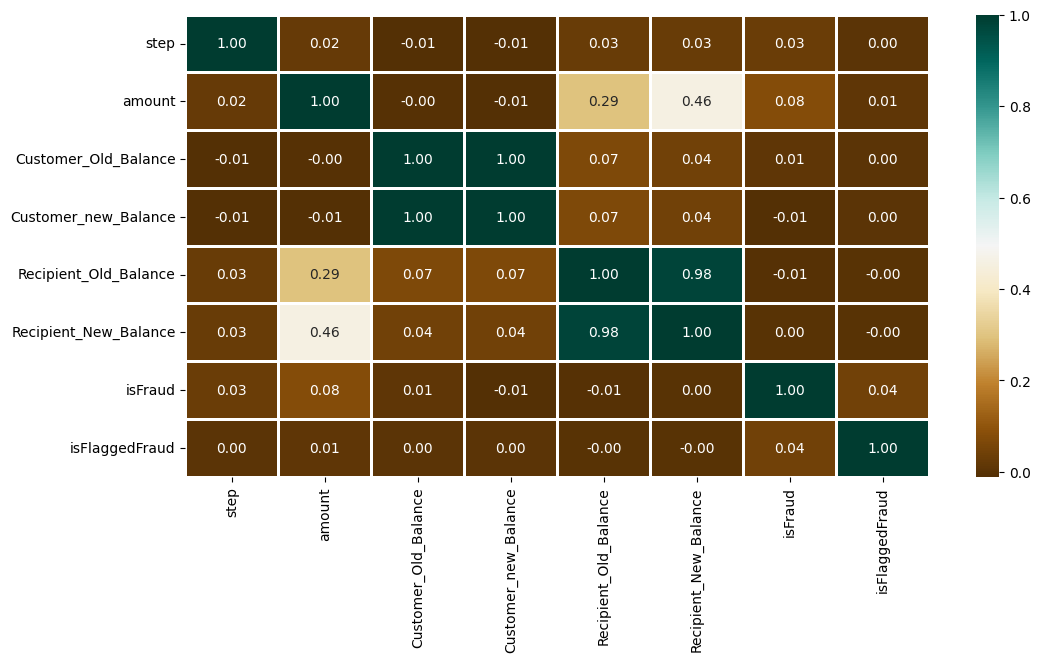

In [ ]:
numeric_data = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

### **DATA PREPROCESSING & MODELING**

As we are done with our analysis and relation between different columns. Next, we will convert our categorical variables into numerical one and perform modeling

In [ ]:
type_dum = pd.get_dummies(dataset["type"])
dataset =pd.concat([dataset,type_dum],axis=1)
dataset.drop("type",axis=1,inplace=True)

#dataset[' loan_status'] = dataset[' loan_status'].map({' Rejected':0, ' Approved':1})

In [ ]:
dataset.head(5)

,step,amount,Customer,Customer_Old_Balance,Customer_new_Balance,Recipient,Recipient_Old_Balance,Recipient_New_Balance,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


# **Importing required ML libraries**

In [ ]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import  ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [ ]:
def Models(models):

    model = models
    X = dataset.drop(columns=['isFraud', 'Customer', 'Recipient']).values
    y = dataset['isFraud'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def cm_plot(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()


In [ ]:
X = dataset.drop(columns=['isFraud', 'Customer', 'Recipient']).values
y = dataset['isFraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

classifiers = [['DecisionTreeClassifier',DecisionTreeClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['ExtraTreesClassifier',ExtraTreesClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()]]
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1_scores = f1_score(y_test, y_pred)*100
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)*100
    ATeS = model.score(X_test,y_test)*100
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS, 'F1 Score':f1_scores}),ignore_index=True )

In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set,F1 Score
2,MLPClassifier,0.028312,99.920709,99.919844,58.093673
5,GradientBoostingClassifier,0.023968,99.943144,99.942555,72.672897
3,AdaBoostClassifier,0.023604,99.943046,99.944284,74.395088
0,DecisionTreeClassifier,0.017862,100.000000,99.968095,87.659574
4,ExtraTreesClassifier,0.017212,100.000000,99.970374,87.378641
1,XGBClassifier,0.015226,99.985717,99.976818,90.691070


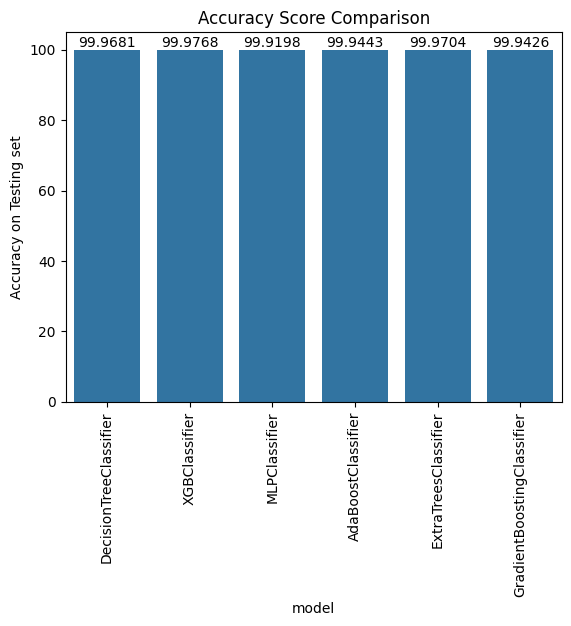

In [ ]:
#Comparing all machine learning algorithm accuracy score by using bar plot.
ax = sns.barplot(data= Acc, x="model", y="Accuracy on Testing set")
ax.set_title('Accuracy Score Comparison')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.4f}'.format(p.get_height()),
        fontsize=10, color='black', ha='center', va='bottom')


### **Comparing F1 scores**

**Conclusion:** With above accuracy score and F1 score charts, we can see the algorithms like Decision Tree, XGboost, MLP, AdaBoost, ExtraTrees & Gradient Classifier are giving similar on this dataset. This shows picking up the right model is very important for prediction. However, with silight better performance Decision Tree and Xgboost giving us maximum F1 score and Accuracy score.